In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("WalmartSQL.csv", sep=';')

In [9]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,dtme,tme,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00,13:08:00,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 00:00:00,10:29:00,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,20:33:00,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00,10:37:00,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February


In [6]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'vat', 'total', 'dtme', 'tme',
       'payment_method', 'cogs', 'gross_margin_pct', 'gross_income', 'rating',
       'time_of_day', 'day_name', 'month_name'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   invoice_id        1000 non-null   object 
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_line      1000 non-null   object 
 6   unit_price        1000 non-null   float64
 7   quantity          1000 non-null   int64  
 8   vat               1000 non-null   float64
 9   total             1000 non-null   float64
 10  dtme              1000 non-null   object 
 11  tme               1000 non-null   object 
 12  payment_method    1000 non-null   object 
 13  cogs              1000 non-null   float64
 14  gross_margin_pct  1000 non-null   float64
 15  gross_income      1000 non-null   float64
 16  rating            1000 non-null   float64
 

In [18]:
df.describe()


,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.7619,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.0000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.7619,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.7619,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.7619,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.7619,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.7619,49.650000,10.00000


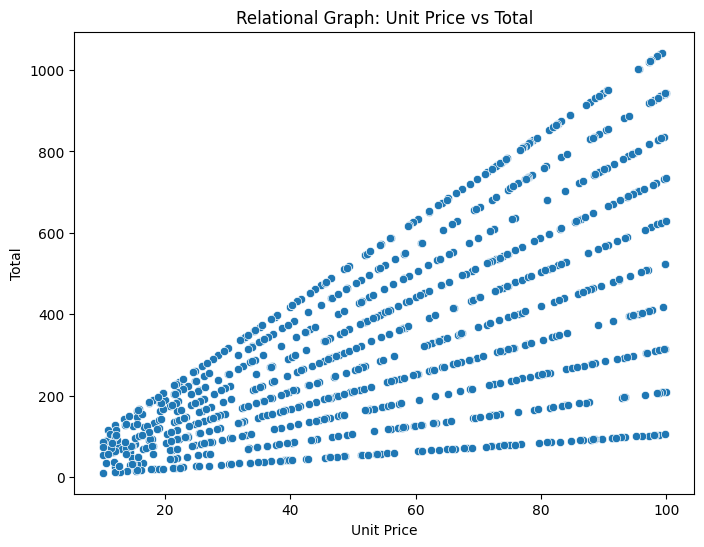

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='unit_price', y='total')
plt.xlabel("Unit Price")
plt.ylabel("Total")
plt.title("Relational Graph: Unit Price vs Total")
plt.show()

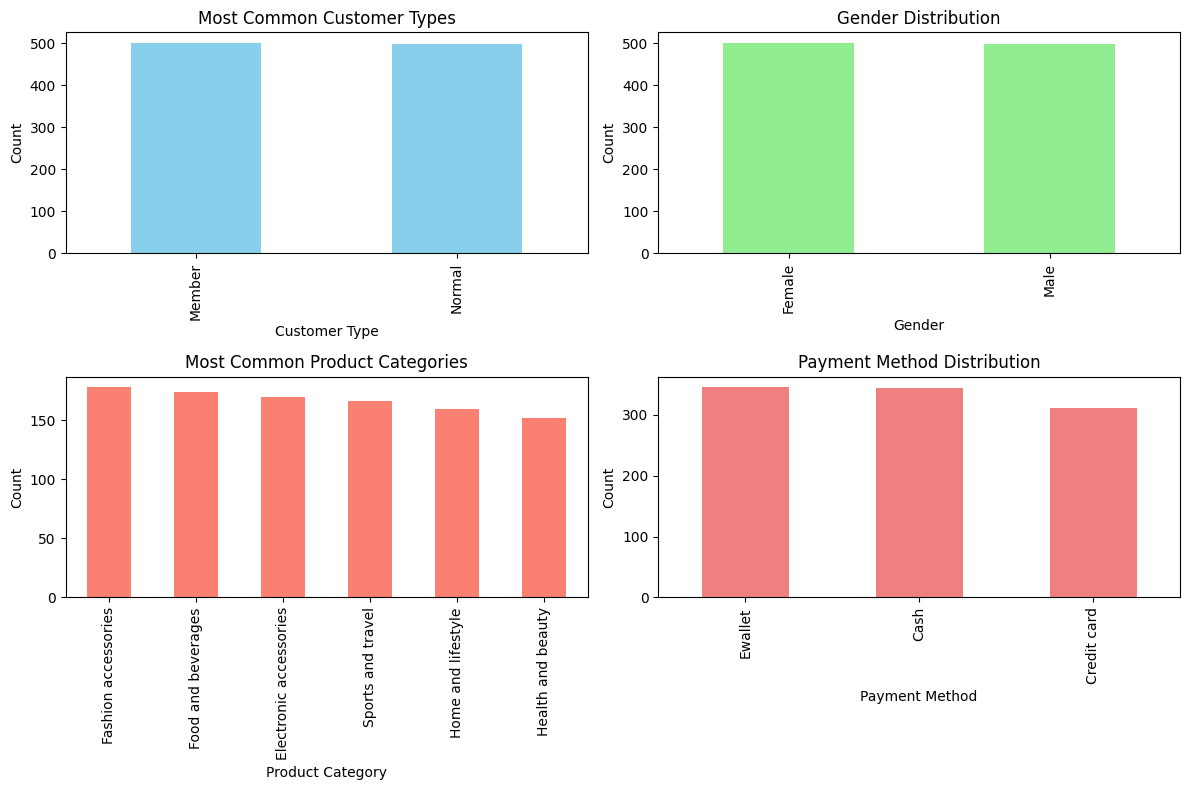

In [14]:
# Count the occurrences of each category
customer_type_count = df['customer_type'].value_counts()
gender_count = df['gender'].value_counts()
product_category_count = df['product_line'].value_counts()
payment_method_count = df['payment_method'].value_counts()

# Plotting the bar charts
plt.figure(figsize=(12, 8))

# Plot for customer types
plt.subplot(221)
customer_type_count.plot(kind='bar', color='skyblue')
plt.title('Most Common Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Plot for gender
plt.subplot(222)
gender_count.plot(kind='bar', color='lightgreen')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot for product categories
plt.subplot(223)
product_category_count.plot(kind='bar', color='salmon')
plt.title('Most Common Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')

# Plot for payment methods
plt.subplot(224)
payment_method_count.plot(kind='bar', color='lightcoral')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

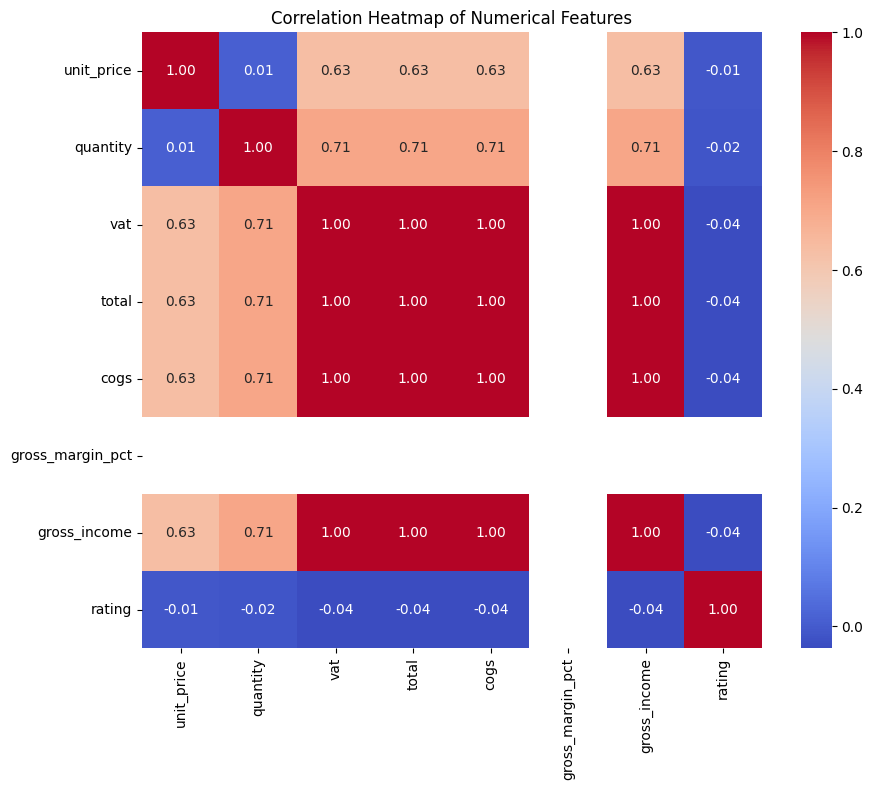

In [16]:
numerical_columns = ['unit_price', 'quantity', 'vat', 'total', 'cogs', 'gross_margin_pct', 'gross_income', 'rating']

# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()